### Bhagyashree Deshpande

#  ONE:
## 1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

# TWO:

## 1) Extract reviews of any product from ecommerce website like amazon
## 2) Perform emotion mining

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')

import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from textblob import TextBlob
from textblob import Word

import re
import sys
import string
import collections
from collections import Counter

import wordcloud
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
tweets = pd.read_csv('Elon_musk.csv', engine = 'python', encoding = 'latin-1')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## Data Understanding

In [3]:
tweets.shape

(1999, 2)

In [4]:
tweets.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [5]:
tweets.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
tweets.describe(include = 'all')

,Unnamed: 0,Text
count,1999.000000,1999
unique,NaN,1997
top,NaN,The most entertaining outcome is the most likely
freq,NaN,2
mean,1000.000000,NaN
std,577.205914,NaN
min,1.000000,NaN
25%,500.500000,NaN
50%,1000.000000,NaN
75%,1499.500000,NaN


In [8]:
tweets['Tweets'] = tweets['Text']

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [20]:
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')
words_data

,Frequency
Word,
,254
spacex,239
amp,218
tesla,166
erdayastronaut,142
...,...
wintonark,8
know,8
,8


In [12]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
tweets["Tweets"] = tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [22]:
tweets["Tweets"] = tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [23]:
tweets["Tweets"] = tweets["Tweets"].str.replace('[0-9]','')

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stop_words = stopwords.words('english')

In [30]:
tweets["Tweets"] = tweets["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [31]:
import re
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

In [32]:
tweets.head()

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,kunalb im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
tweets["Tweets"] = tweets["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [35]:
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [36]:
tweets_set = tweets["Tweets"]
tweets_set

0                                        kunalb im alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                        joerogan spotify great interview
3                               gtera doge underestimated
4       teslacn congratulation tesla china amazing exe...
                              ...                        
1994    flcnhvy true sound surreal negative propaganda...
1995    ppathole make sure read ur term amp condition ...
1996                    teslagong ppathole samwise gamgee
1997                      ppathole altho dumb dumber ufuf
1998                               progress update august
Name: Tweets, Length: 1999, dtype: object

In [37]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [38]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF" 
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [39]:
vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [40]:
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])

In [41]:
freq = pd.Series(' '.join(tweets["Tweets"]).split()).value_counts()[0:20]
freq.head(10)

spacex            239
amp               218
tesla             169
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head(5)

,Tweets,polarity
0,kunalb im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


In [44]:
tweets[tweets.polarity>0].head(5)

,Unnamed: 0,Text,Tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.200000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000


In [45]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.152381
1995,1996,ppathole make sure read ur term amp condition ...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


In [46]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [47]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [48]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

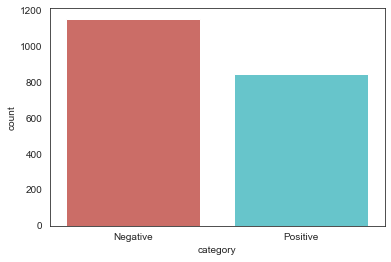

In [49]:
sns.countplot(x='category',data=tweets,palette='hls');

In [50]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    57.778889
Positive    42.221111
Name: category, dtype: float64

## Conclusion

From the model and word cloud, we conclude that, in the tweets, the most frequent word used includes amp,great,tesla,spacex etc. From the prediction by Sentiment Analysis, these tweets have 58% negative words and 42% positive words.